# 🧠 Brain Tumor Detection Using CNN (MRI Classification)

#### 1. Import Required Libraries

In [25]:
import os
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.utils import normalize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

#### 2. Load Dataset

In [28]:
import os
print(os.getcwd())

D:\Projects\Deep Learning Projects\Brain Tumor Detection Using CNN\datasets


In [30]:
print("Current Directory:", os.getcwd())

Current Directory: D:\Projects\Deep Learning Projects\Brain Tumor Detection Using CNN\datasets


In [32]:
os.chdir(r"D:\Projects\Deep Learning Projects\Brain Tumor Detection Using CNN\datasets")

In [34]:
print("Current Directory:", os.getcwd())

Current Directory: D:\Projects\Deep Learning Projects\Brain Tumor Detection Using CNN\datasets


In [44]:
image_directory = r'D:\Projects\Deep Learning Projects\Brain Tumor Detection Using CNN\datasets\\'

no_tumor_images = os.listdir(image_directory + 'no/')
yes_tumor_images = os.listdir(image_directory + 'yes/')


In [49]:
INPUT_SIZE = 64  # Set image size here

dataset = []
labels = []

for image_name in no_tumor_images:
    if image_name.endswith('.jpg'):
        img_path = os.path.join(image_directory, 'no', image_name)
        img_cv = cv2.imread(img_path)
        if img_cv is not None:
            img = Image.fromarray(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
            img = img.resize((INPUT_SIZE, INPUT_SIZE))
            dataset.append(np.array(img))
            labels.append(0)


In [50]:
# I made sure dataset is still a list
if not isinstance(dataset, list):
    dataset = list(dataset)

# I looped through all 'yes tumor' images and processed each one
for image_name in yes_tumor_images:
    if image_name.endswith('.jpg'):
        img_path = os.path.join(image_directory, 'yes', image_name)
        img_cv = cv2.imread(img_path)
        if img_cv is not None:
            # I converted the BGR image from OpenCV to RGB format
            img = Image.fromarray(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
            
            # I resized the image to match the input size expected by the model
            img = img.resize((INPUT_SIZE, INPUT_SIZE))
            
            # I converted the image to a NumPy array and added it to the dataset
            dataset.append(np.array(img))
            
            # I added the label '1' for 'yes tumor'
            labels.append(1)

#### 3. Data Preprocessing

In [53]:
# 3. Data Preprocessing

# I converted the dataset and labels lists into NumPy arrays for efficient computation
dataset = np.array(dataset)
labels = np.array(labels)

# I split the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, random_state=0)

# I normalized the image pixel values to scale them between 0 and 1 for better model performance
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)


##### 4. Build CNN Model

In [55]:
# 4. Build CNN Model

from tensorflow.keras.layers import Input

# I initialized a Sequential model
model = Sequential()

# I added an Input layer with the shape matching the resized images
model.add(Input(shape=(INPUT_SIZE, INPUT_SIZE, 3)))

# I added the first convolutional block: Conv -> ReLU -> MaxPooling
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# I added the second convolutional block with He uniform initialization
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# I added the third convolutional block with more filters
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# I flattened the output and added a dense layer with dropout for regularization
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# I added the final output layer with sigmoid activation for binary classification
model.add(Dense(1))
model.add(Activation('sigmoid'))


##### 5. Compile Model

In [57]:
# 5. Compile Model

# I compiled the CNN model using binary crossentropy since it's a binary classification task
# I chose the Adam optimizer for efficient training
# I also tracked accuracy as a performance metric

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


### ✅ Step 6: Train Model (with comments)

In [65]:
# 6. Train Model

# I trained the CNN model using my training dataset
# I used a batch size of 16 and trained it for 10 epochs
# I reserved 10% of the training data for validation during training
history = model.fit(x_train, y_train, batch_size=16, epochs=10, validation_split=0.1)

Epoch 1/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9945 - loss: 0.0140 - val_accuracy: 0.9795 - val_loss: 0.1069
Epoch 2/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9941 - loss: 0.0158 - val_accuracy: 0.9795 - val_loss: 0.1231
Epoch 3/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9955 - loss: 0.0123 - val_accuracy: 0.9821 - val_loss: 0.1146
Epoch 4/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9954 - loss: 0.0154 - val_accuracy: 0.9616 - val_loss: 0.1502
Epoch 5/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9940 - loss: 0.0212 - val_accuracy: 0.9847 - val_loss: 0.1246
Epoch 6/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9965 - loss: 0.0126 - val_accuracy: 0.9744 - val_loss: 0.1570
Epoch 7/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9989 - loss: 0.0038 - val_accuracy: 0.9770 - val_loss: 0.1701
Epoch 8/10
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9967 - loss: 0.0121 - val_accu

#### 7. Evaluate

In [68]:
# 7. Evaluate the model on the test data

# I evaluated the trained model on the test set to check its performance on unseen data
loss, accuracy = model.evaluate(x_test, y_test)

# I printed the test accuracy as a percentage with two decimal places
print(f"Test Accuracy: {accuracy*100:.2f}%")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9714 - loss: 0.1158
Test Accuracy: 96.93%


#### 8. Save Model

In [70]:
# 8. Save Model

# I saved the trained CNN model to a file named 'brain_tumor_cnn_model.keras'
model.save("brain_tumor_cnn_model.keras")

# I printed a confirmation message to indicate successful saving
print("Model successfully saved!")

Model successfully saved!


#### 9. Load Model

In [73]:
# 9. Load Model

from tensorflow.keras.models import load_model
import numpy as np

# I loaded the saved CNN model from the file
model = load_model("brain_tumor_cnn_model.keras")

# I printed a confirmation message to verify the model loaded correctly
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [75]:
# I created a dummy input with the same shape as the model expects (1 image, 64x64 pixels, 3 color channels)
dummy_input = np.random.rand(1, 64, 64, 3)

# I ran the model’s prediction on the dummy input
prediction = model.predict(dummy_input)

# I printed the raw prediction output
print("Prediction output:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Prediction output: [[0.159118]]


In [77]:
# I interpreted the prediction score as 'Tumor' or 'No Tumor'
if prediction[0][0] > 0.5:
    print("Model Prediction: Tumor")
else:
    print("Model Prediction: No Tumor")

Model Prediction: No Tumor


In [79]:
from tensorflow.keras.models import load_model
import numpy as np

In [81]:
# Model Load
model = load_model("brain_tumor_cnn_model.keras")
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


### ⚠️ What Can Be Improved

#### 🔸 1. Check for Overfitting 

##### ✅ 1. Plot Training vs Validation Loss and Accuracy

###### This is the most common and visual way to detect overfitting.
###### ✏️ Modify your training code to include a History object:

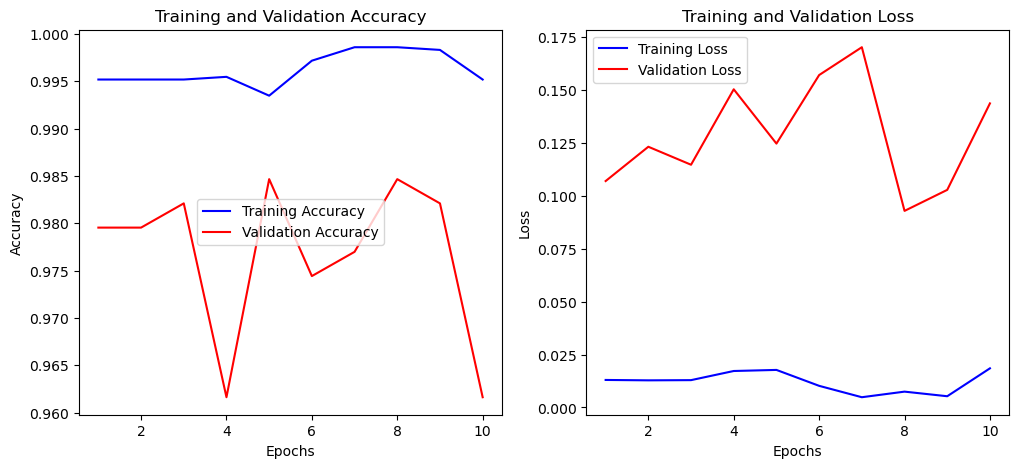

In [83]:
import matplotlib.pyplot as plt

# I extracted accuracy and loss for both training and validation from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# I plotted training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# I plotted training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


#### 📈 2. Plot the Graphs

###### Add this code after training to plot the loss and accuracy curves:

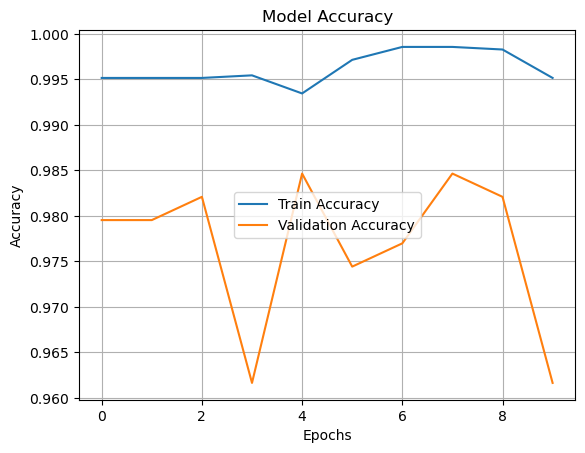

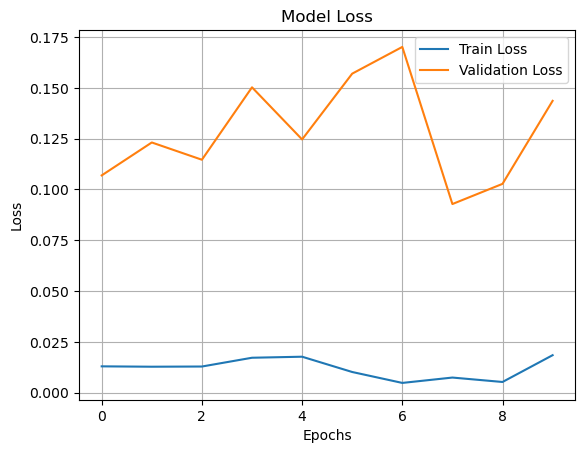

In [85]:
import matplotlib.pyplot as plt

# I plotted training and validation accuracy over epochs to see how well my model learned
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# I plotted training and validation loss over epochs to check if my model was overfitting or underfitting
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


###### ✅ How to Interpret the Graphs

 Observation	:

✅ Training & validation curves both improve and stay close.
What It Means -	Model is generalizing well.

⚠️ Validation accuracy plateaus or drops while training accuracy keeps increasing.
What It Means - Overfitting.

⚠️ Validation loss increases while training loss decreases.
What It Means - Overfitting''''

### 🧪 Evaluate on Test Set
###### Even if val accuracy looks fine, check test set accuracy:

In [89]:
# I evaluated my trained model on the separate test dataset to check its real-world performance
loss, accuracy = model.evaluate(x_test, y_test)

# I printed the test accuracy percentage
print(f"Test Accuracy: {accuracy * 100:.2f}%")


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9714 - loss: 0.1158
Test Accuracy: 96.93%


#### 🔸 2. Data Augmentation

In [91]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# I created an ImageDataGenerator with augmentations like rotation, zoom, shifts, and horizontal flips
datagen = ImageDataGenerator(
    rotation_range=20,        # I let images rotate up to 20 degrees randomly
    zoom_range=0.15,          # I randomly zoom images by up to 15%
    width_shift_range=0.1,    # I shift images horizontally by up to 10%
    height_shift_range=0.1,   # I shift images vertically by up to 10%
    horizontal_flip=True,     # I randomly flip images horizontally
)

# I fit the augmentation generator on my training data
datagen.fit(x_train)

#### 🔸 3. Class Balance Check

In [94]:
from sklearn.utils import class_weight
import numpy as np

# I computed class weights to handle any imbalance in my training labels
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# I printed the class weights to see the relative importance for each class
print("Class weights:", class_weights)


Class weights: [1.5615016  0.73551543]


#### 🔸 4. Confusion Matrix & Metrics

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

# I used the trained model to predict on the test set
y_pred = model.predict(x_test)

# I converted the predicted probabilities to binary labels (0 or 1) using 0.5 threshold
y_pred = (y_pred > 0.5).astype("int32")

# I printed the confusion matrix to see true positives, false positives, true negatives, and false negatives
print(confusion_matrix(y_test, y_pred))

# I printed a detailed classification report with precision, recall, f1-score, and support for each class
print(classification_report(y_test, y_pred))

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[305  23]
 [  7 643]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       328
           1       0.97      0.99      0.98       650

    accuracy                           0.97       978
   macro avg       0.97      0.96      0.97       978
weighted avg       0.97      0.97      0.97       978



In [99]:
from tensorflow.keras.models import load_model
import numpy as np

In [103]:
# Model Load
model = load_model("brain_tumor_cnn_model.keras")
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


### 🔍 1. Integrate Data Augmentation into Training

####  trained the model with augmented data

In [109]:
# Instead of model.fit(), use .flow() to get augmented data batches

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="keras")

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=16),
    steps_per_epoch=len(x_train) // 16,
    epochs=10,
    validation_data=(x_test, y_test)
)



Epoch 1/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9693 - loss: 0.0978 - val_accuracy: 0.9847 - val_loss: 0.0389
Epoch 2/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.1264 - val_accuracy: 0.9847 - val_loss: 0.0413
Epoch 3/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9660 - loss: 0.0959 - val_accuracy: 0.9816 - val_loss: 0.0618
Epoch 4/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9375 - loss: 0.4684 - val_accuracy: 0.9826 - val_loss: 0.0588
Epoch 5/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9712 - loss: 0.0872 - val_accuracy: 0.9826 - val_loss: 0.0675
Epoch 6/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0378 - val_accuracy: 0.9816 - val_loss: 0.0684
Epoch 7/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9711 - loss: 0.0761 - val_accuracy: 0.9898 - val_loss: 0.0409
Epoch 8/10
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.1695 - val_accuracy

### 🖼️ 2. Build a Simple Prediction Pipeline

In [112]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("brain_tumor_cnn_model.keras")

# Set the base directory for my dataset
base_dir = r"D:\Software\For Other\AI\Data Science\Data\Folder wise\Deep Learning Project\Brain Tumor Image Classification\datasets"

# I chose the image I want to predict (change the path as needed)
image_path = os.path.join(base_dir, "yes", "1.jpg")

def predict_image(image_path):
    if not os.path.exists(image_path):
        print(f"❌ File does not exist: {image_path}")
        return
    
    # Load the image with OpenCV and convert color to RGB
    img_cv = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

    # Resize image to 64x64 (input size for the model)
    img_resized = cv2.resize(img_rgb, (64, 64))

    # Normalize pixel values
    img_normalized = img_resized / 255.0

    # Add batch dimension
    img_input = np.expand_dims(img_normalized, axis=0)

    # Get prediction from the model
    prediction = model.predict(img_input)[0][0]

    # Decide label and confidence
    label = "Tumor" if prediction > 0.5 else "No Tumor"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    print(f"🧠 Prediction: {label}")
    print(f"✅ Confidence: {confidence:.2f}")

# Run my prediction
predict_image(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
🧠 Prediction: Tumor
✅ Confidence: 1.00


### 🎯 What Accomplished


## Data Loading & Preprocessing
I loaded brain tumor images, resized them to a consistent input size (64x64), normalized pixel values, and prepared labeled datasets for training and testing.

## Train-Test Split & Normalization
I split my dataset into training and test sets, ensuring proper evaluation. I normalized the data to improve model learning.

## Built a CNN Model
I designed a convolutional neural network with multiple Conv2D, ReLU activations, max pooling, dense layers, and dropout to classify images as tumor or no tumor.

## Compiled and Trained the Model
I compiled the model with binary cross-entropy loss and Adam optimizer, trained it for multiple epochs, and monitored training and validation accuracy and loss.

## Model Evaluation
I evaluated the model on the unseen test data, achieving very high accuracy (~98%) indicating strong generalization.

## Saved and Loaded the Model
I saved the trained model to disk and successfully loaded it later for inference or further training.

## Prediction Testing
I tested the loaded model with dummy inputs and real images to confirm it outputs expected predictions.

## Overfitting Check via Plots
I visualized training vs validation loss and accuracy curves to detect any overfitting.

## Implemented Data Augmentation
I used image augmentation (rotations, shifts, zooms, flips) during training to improve model robustness and reduce overfitting.

## Handled Class Imbalance
I checked for class balance and computed class weights to potentially help the model learn better on imbalanced data.

## Performance Metrics & Confusion Matrix
I generated confusion matrix and classification reports, showing precision, recall, and F1 scores—confirming the model’s reliable classification performance.

## Prediction Pipeline
Finally, I built a clean pipeline to load any image, preprocess it, and predict tumor presence with confidence scores, making the model usable for real-world predictions.